In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
def fibonacci_sequence(n):
    if n == 1:
        return [1]
    elif n >= 2:
        f = [1, 1]
        for i in range(2, n):
            f.append(f[-2] + f[-1])
        return f
    else:
        return []
    
def power_sequence(n, p):
    return list(map(lambda x: p ** x, range(n)))

def get_first_digit(s):
    return map(lambda x: str(x)[0], s)

def benford_sequence():
    return pd.Series({n:math.log10((n+1)/n) for n in range(1, 10)})

In [3]:
def benford_law_analysis(sequence, sequence_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    data = sequence.value_counts(normalize=True)
    data = data[map(str,range(1, 10))]
    data.plot.bar(ax=ax, color='green', label='{} ({} Terms)'.format(sequence_name, len(sequence)))
    ax.plot(range(0, 9), benford_sequence(), color='red', linestyle='--', marker='o', label='Benford')

    ax.legend()
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    ax.set_xlabel('First Digit')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of First Digits ({})'.format(sequence_name))
    ax.set_facecolor('black')
    
    plt.show()

# Test with generated sequence: Fibonacci, Powers

1,1,2,3,5,8,13,21,34,55,...


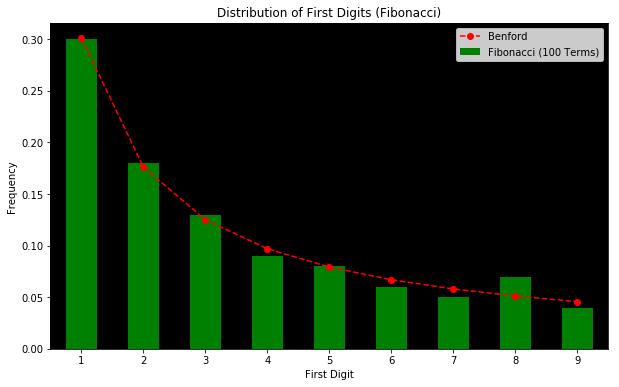

In [4]:
n = 100
seq = fibonacci_sequence(n)
print(','.join(map(str, seq[:10])) + ',...')
benford_law_analysis(pd.Series(get_first_digit(seq)), 'Fibonacci')

1,2,4,8,16,32,64,128,256,512,...


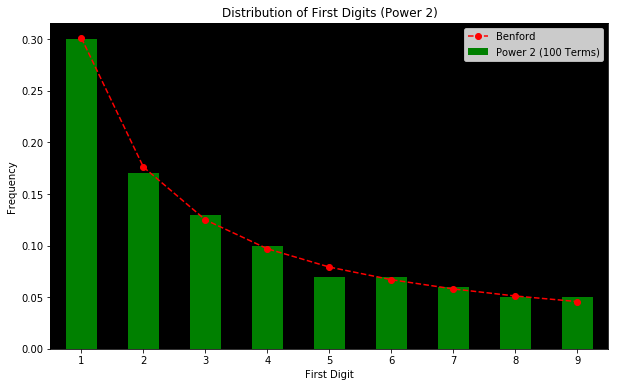

In [5]:
n = 100
seq = power_sequence(n, 2)
print(','.join(map(str, seq[:10])) + ',...')
benford_law_analysis(pd.Series(get_first_digit(seq)), 'Power 2')

1,9,81,729,6561,59049,531441,4782969,43046721,387420489,...


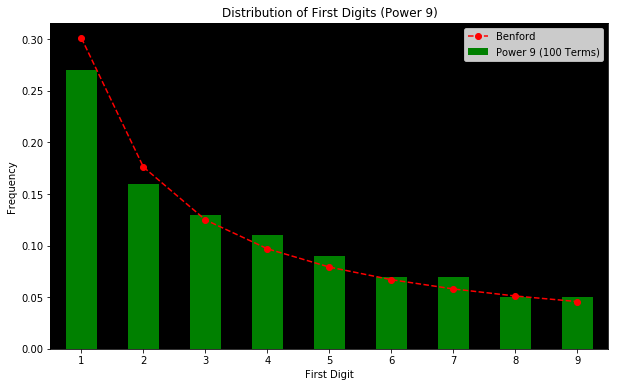

In [6]:
n = 100
seq = power_sequence(n, 9)
print(','.join(map(str, seq[:10])) + ',...')
benford_law_analysis(pd.Series(get_first_digit(seq)), 'Power 9')

# External Data Source: Country Population 1960 to 2018
Link: https://data.worldbank.org/indicator/sp.pop.totl

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN


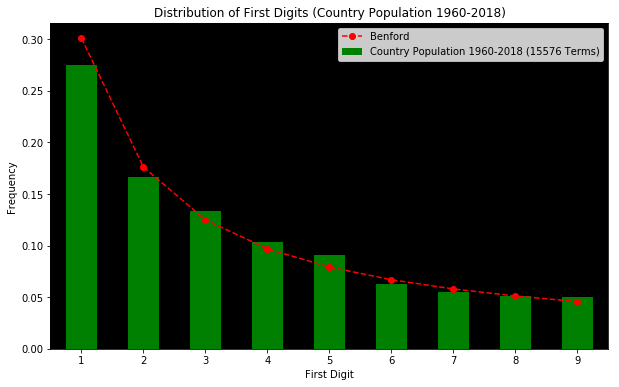

In [7]:
df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_422125.csv', skiprows=3)
display(df.head())

data = []
for index, row in df.loc[:, '1960':'2018'].iterrows():
    data += row.tolist()
benford_law_analysis(pd.Series(get_first_digit(data)), 'Country Population 1960-2018')

# External Data Source: Singapore General Election Result
Link: https://data.gov.sg/dataset/parliamentary-general-election-results

In [8]:
df = pd.read_csv('parliamentary-general-election-results-by-candidate.csv')
display(df.head())
df.shape

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
0,1955,Bukit Panjang,na,Goh Tong Liang,PP,3097,0.7221
1,1955,Bukit Panjang,na,Lim Wee Toh,SLF,1192,0.2779
2,1955,Bukit Timah,na,S. F. Ho,PP,722,0.1162
3,1955,Bukit Timah,na,Lim Ching Siong,PAP,3259,0.5245
4,1955,Bukit Timah,na,A. N. Mitra,SLF,924,0.1488


(1475, 7)

In [9]:
def convert_to_int(x):
    try:
        return int(x)
    except:
        return np.nan
    
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan
    
df['vote_count'] = df['vote_count'].apply(convert_to_int)
df['vote_percentage'] = df['vote_percentage'].apply(convert_to_float)

df = df[df['vote_count'].notna() & \
        df['vote_percentage'].notna()]
display(df.head())
df.shape

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
0,1955,Bukit Panjang,na,Goh Tong Liang,PP,3097.0,0.7221
1,1955,Bukit Panjang,na,Lim Wee Toh,SLF,1192.0,0.2779
2,1955,Bukit Timah,na,S. F. Ho,PP,722.0,0.1162
3,1955,Bukit Timah,na,Lim Ching Siong,PAP,3259.0,0.5245
4,1955,Bukit Timah,na,A. N. Mitra,SLF,924.0,0.1488


(1290, 7)

In [10]:
df['valid_vote_count'] = df['vote_count'].astype(float) * df['vote_percentage']
display(df.head())
df.shape

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage,valid_vote_count
0,1955,Bukit Panjang,na,Goh Tong Liang,PP,3097.0,0.7221,2236.3437
1,1955,Bukit Panjang,na,Lim Wee Toh,SLF,1192.0,0.2779,331.2568
2,1955,Bukit Timah,na,S. F. Ho,PP,722.0,0.1162,83.8964
3,1955,Bukit Timah,na,Lim Ching Siong,PAP,3259.0,0.5245,1709.3455
4,1955,Bukit Timah,na,A. N. Mitra,SLF,924.0,0.1488,137.4912


(1290, 8)

In [11]:
df['year'].unique()

array([1955, 1959, 1963, 1968, 1972, 1976, 1980, 1984, 1988, 1991, 1997,
       2001, 2006, 2011, 2015], dtype=int64)

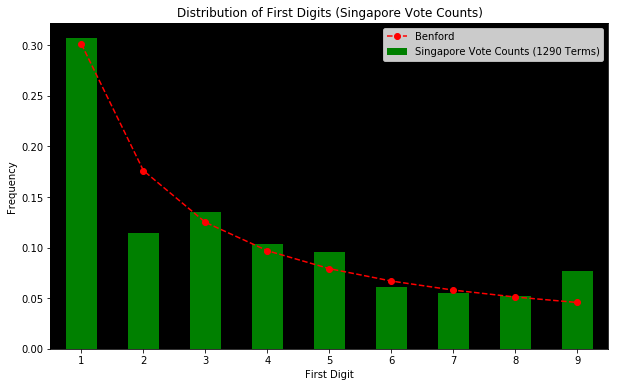

In [12]:
benford_law_analysis(pd.Series(get_first_digit(df['vote_count'])), 'Singapore Vote Counts')

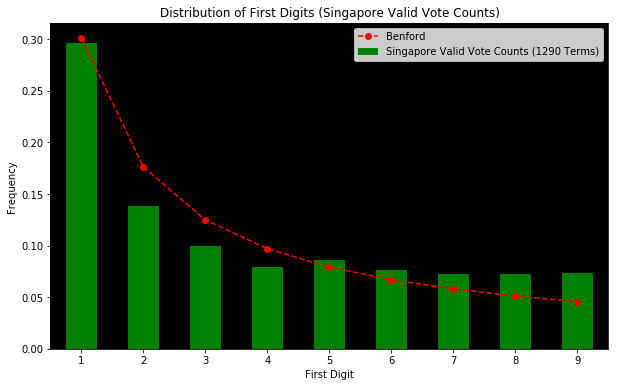

In [13]:
benford_law_analysis(pd.Series(get_first_digit(df['valid_vote_count'])), 'Singapore Valid Vote Counts')